In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def run_episode(env, parameters):
    observation = env.reset()
    total_reward = 0
    actions = []
    for _ in range(200):
        env.render()
        action = 0 if np.matmul(parameters, observation) < 0 else 1
        actions.append(action)
        observation, reward, done, info = env.step(action)
        total_reward += reward
        if done:
            break
    env.close()
    return total_reward, actions

In [4]:
# initialize the environment

env = gym.make('CartPole-v0')
rewards = []
num_iterations = []

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [13]:
# strategy 1 : just change the weights randomly until we get the weight that maximizes the reward, and store it

best_params = None
best_reward = 0
for _ in range(1000):
    parameters = np.random.rand(4) * 2 - 1
    reward = run_episode(env, parameters)
    
    rewards.append(reward)
    num_iterations.append(_)
    
    if reward > best_reward:
        best_reward = reward
        best_params = parameters
        
        # issue solved if the agent survives for 200 timestamps
        
    if best_reward == 200:
        break

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


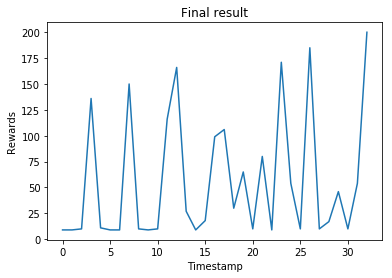

In [17]:
plt.xlabel("Timestamp")
plt.ylabel("Rewards")
plt.title("Final result")
plt.plot(num_iterations, rewards)

In [8]:
# strategy 2 : start with random weights, at every step, add some noise to the weights, also called hill climbing

noise_param = 0.5
parameters = np.random.rand(4) * 2 - 1

best_reward = 0
best_params = None

rewards = []
num_iterations = []

for _ in range(1000):
    parameters = parameters + (np.random.rand(4) * 2 - 1) * noise_param
    reward, actions = run_episode(env, parameters)
    
    rewards.append(reward)
    num_iterations.append(_)
    
    if reward > best_reward:
        best_reward = reward
        best_params = parameters
        
    if reward == 200:
        break

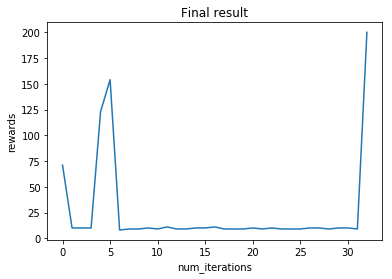

In [9]:
plt.xlabel("num_iterations")
plt.ylabel("rewards")
plt.title("Final result")
plt.plot(num_iterations, rewards)